In [1]:
import os, sys
sys.path.append('..')
import json
from collections import defaultdict
from tasks import *
path = '../results/plot/hallu'
merged_responses = {}
problem_num = 500
dataset_loc = '../dataset'

task_number = {}

all_files = os.listdir(path)
print(all_files)
distance=False
mis=False

for f in all_files:
    if len(f.split('_')) < 2:
        continue
    llm, task, difficulty = f.split('_')[0], f.split('_')[1], f.split('_')[2].split('.')[0]
    if task not in ['Connected', 'MIS', 'Diameter']:    #['GED', 'TSP', 'MCS']:
        continue
    task = task + "_" + difficulty
    with open(f'{path}/{f}', 'r') as file:
        response_dict = json.load(file)
    
    for i in range(0, problem_num):
        if task not in merged_responses:
            merged_responses[task] = defaultdict(dict)
        merged_responses[task][i][llm] = response_dict[str(i)][llm]

task_list = list(merged_responses.keys())
task_list = sorted(task_list)
print(task_list)


['claude_Connected_hard.json', 'qwen_Connected_easy.json', 'qwen7b_Neighbor_easy.json', 'claude_GED_hard.json', 'gpt4_Neighbor_easy.json', 'deepseek_Diameter_hard.json', 'qwen7b_TSP_hard.json', 'mixtral_MCS_hard.json', 'gpt_MCP_easy.json', 'qwen7b_MCS_easy.json', 'llama_Diameter_easy.json', 'gemma_Diameter_easy.json', 'mixtral_GED_hard.json', 'qwen_MCS_hard.json', 'gpt_Distance_hard.json', 'qwen_MCS_easy.json', 'mixtral_Connected_hard.json', 'llama8b_MCS_easy.json', 'gpt4_Distance_easy.json', 'llama_MVC_hard.json', 'mixtral_Neighbor_hard.json', 'llama_MIS_hard.json', 'qwen7b_MVC_easy.json', 'llama_MIS_easy.json', 'gpt_Distance_easy.json', 'qwen_GED_easy.json', 'claude_TSP_hard.json', 'gemma_MVC_hard.json', 'qwen7b_MCS_hard.json', 'deepseek_Distance_easy.json', 'llama_MCS_hard.json', 'llama_Neighbor_hard.json', 'gpt4_MCP_easy.json', 'mixtral_MCP_hard.json', 'gpt4_MIS_easy.json', 'claude_Diameter_hard.json', 'llama_Diameter_hard.json', 'qwen_TSP_hard.json', 'gemma_Diameter_hard.json', 'q

In [2]:
score = {}
node_size = {}
for task_name in task_list:
    print(task_name)
    difficulty=task_name.split('_')[1]
    cur_name=task_name.split('_')[0]

    task= globals()[cur_name + '_Task'](dataset_loc)
    task.load_dataset(difficulty)
    score[task_name] = defaultdict(dict)
    node_size[task_name] = defaultdict(dict)
    for i in range(0, problem_num):
        score[task_name][i]['gt'] = task.problem_set[i]['exact_answer']
        if score[task_name][i]['gt'] is None:
            score[task_name][i]['gt'] = task.problem_set[i]['approx_answer']
        for llm in merged_responses[task_name][i].keys():
            if llm == 'problem':
                continue
            r = merged_responses[task_name][i][llm]
            score[task_name][i][llm] = task.check_solution(i, r)
            
            if cur_name in ['GED','MCS']:
                g = task.problem_set[i]['graph'][0]
                node_size[task_name][i][llm] = g.number_of_nodes()
            else:
                g = task.problem_set[i]['graph']
                node_size[task_name][i][llm] = g.number_of_nodes()

Connected_easy
Connected_hard
Diameter_easy
Diameter_hard
MIS_easy
MIS_hard


In [3]:
import numpy as np
import pickle
metrics = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
less_is_better = ['Distance']
results = []
cnt = 0
for task in task_list:
    cnt = cnt + 1
    print(task)
    model_list = list(score[task][0].keys())
    model_list.remove('gt')
    cur_task = task.split('_')[0]
    for model in model_list:
        if cnt % 2 != 0:
            for i in range(5,31):
                metrics[cur_task][model][str(i)]=[]
        for i in range(0, problem_num):
            node_num = node_size[task][i][model]
            if node_num <5 or node_num >30:
                continue

            metrics[cur_task][model][str(node_num)].append(score[task][i][model]==-2)
            
        if cnt %2 ==0:  
            avg=[]
            avg.append(cur_task)
            avg.append(model)
            for i in range(5,31):
                avg.append(np.mean(metrics[cur_task][model][str(i)]))
        
            result = tuple(avg)
            print(result)
            results.append(result)
print(results)

# with open('results_mcp_mvc_distance_neighbor.pkl', 'wb') as f:
    # pickle.dump(results, f)


Connected_easy
Connected_hard
('Connected', 'claude', 0.6021505376344086, 0.75, 0.7321428571428571, 0.6792452830188679, 0.7894736842105263, 0.6875, 0.6666666666666666, 0.8181818181818182, 0.8461538461538461, 0.8333333333333334, 0.84375, 0.8225806451612904, 0.9056603773584906, 0.8823529411764706, 0.8484848484848485, 0.9, 0.9090909090909091, 0.875, 0.9545454545454546, 0.8666666666666667, 0.8928571428571429, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0)
('Connected', 'mixtral', 0.43010752688172044, 0.5555555555555556, 0.5714285714285714, 0.4528301886792453, 0.6052631578947368, 0.53125, 0.4583333333333333, 0.7272727272727273, 0.7692307692307693, 0.5, 0.5, 0.532258064516129, 0.49056603773584906, 0.4117647058823529, 0.48484848484848486, 0.5, 0.6363636363636364, 0.7916666666666666, 0.6363636363636364, 0.6, 0.5, 0.5625, 0.6666666666666666, 0.6363636363636364, 0.5, 0.42857142857142855)
('Connected', 'deepseek', 0.3118279569892473, 0.375, 0.5357142857142857, 0.5283018867924528, 0.6052631578947368, 0.6

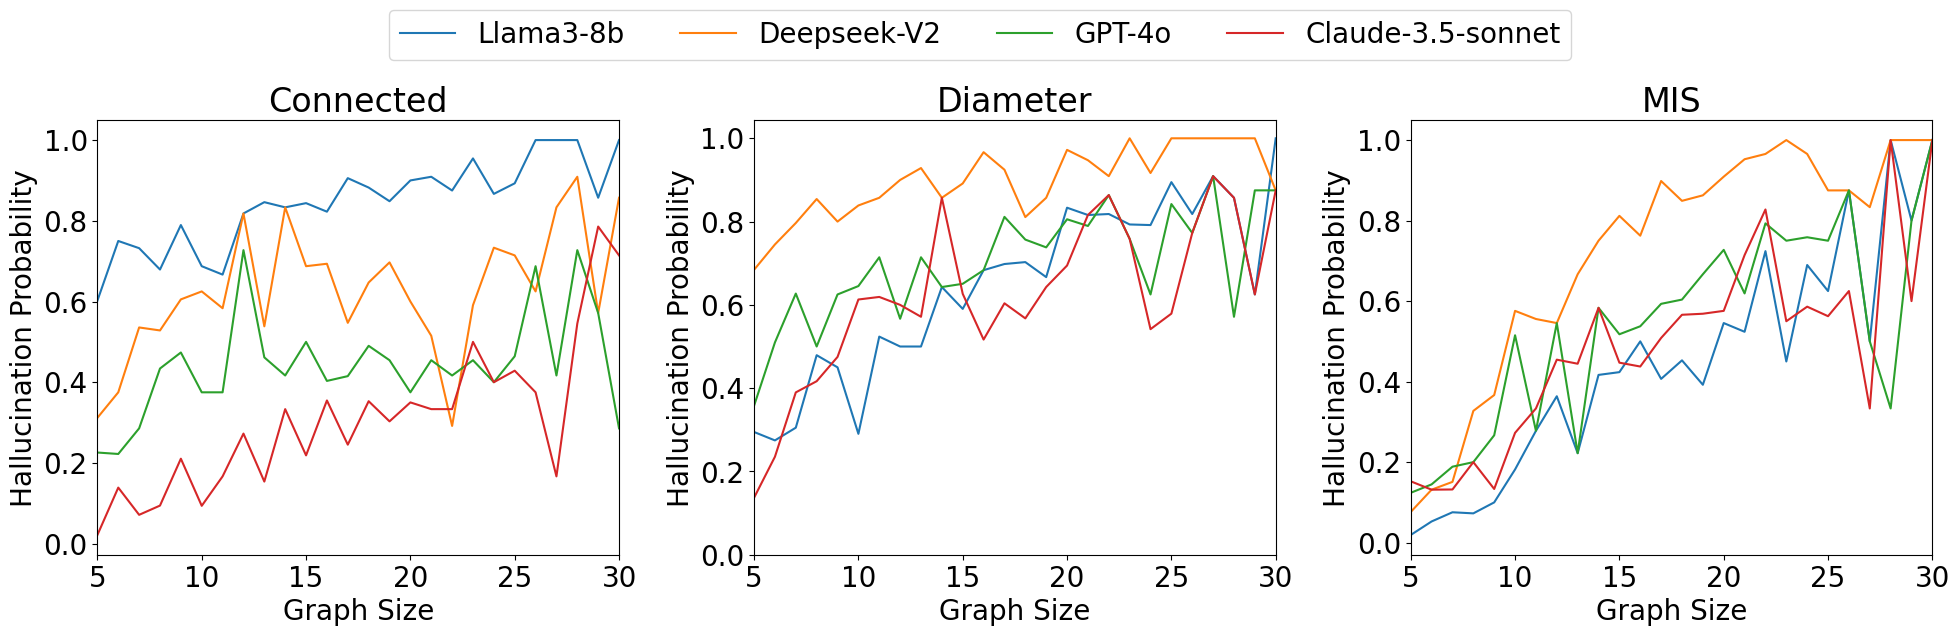

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20}) #, 'font.family': 'Times New Roman'})

tasks = set(result[0] for result in results)
fig, axs = plt.subplots(1, len(tasks), figsize=(20, 6))
for i, task in enumerate(tasks):
    task_results = [result for result in results if result[0] == task]
    plotted_models = []
    for result in task_results:
        model = result[1]
        model_list = 'gpt4,gpt4mini,claude,glm,llama,llama8b,deepseek,qwen72b,mixtral,gemma'.split(',')
        if model not in ['gpt4', 'deepseek', 'claude', 'llama', 'qwen72b']  or model in plotted_models:
            continue
        feasibility_values = result[2:] 
        sizes = list(range(5, 31))
        label = model
        axs[i].plot(sizes, feasibility_values, label=label)
        plotted_models.append(model)

    axs[i].set_title(f'{task}')
    axs[i].set_xlabel('Graph Size')
    axs[i].set_ylabel('Hallucination Probability')
    axs[i].set_xlim(5, 20) 
    axs[i].set_xticks([5, 10, 15, 20,25,30])
    axs[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

handles, labels = axs[i].get_legend_handles_labels()

for i in range(len(labels)):
    if labels[i] == 'llama':
        labels[i] = 'Llama3-8b'
    elif labels[i] == 'claude':
        labels[i] = 'Claude-3.5-sonnet'
    elif labels[i] == 'deepseek':
        labels[i] = 'Deepseek-V2'
    elif labels[i] == 'qwen72b':
        labels[i] = 'Qwen2.5-72b'
    elif labels[i] == 'gpt4':
        labels[i] = 'GPT-4o'
    elif labels[i] == 'mixtral':
        labels[i] = 'Mixtral-7x8b'
unique_labels = labels
unique_handles = [handles[labels.index(label)] for label in unique_labels]
fig.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=20)

plt.tight_layout()
plt.show()
